<a href="https://colab.research.google.com/github/SergeyShchus/Data-analysis-Notebooks/blob/main/Notebooks/Population_census_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!wget https://github.com/SergeyShchus/Data-analysis-Notebooks/blob/main/Data/census_tracts_data_la.csv

--2022-01-24 19:13:04--  https://github.com/SergeyShchus/Data-analysis-Notebooks/blob/main/Data/census_tracts_data_la.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘census_tracts_data_la.csv’

census_tracts_data_     [ <=>                ]   2.10M  --.-KB/s    in 0.07s   

2022-01-24 19:13:05 (31.3 MB/s) - ‘census_tracts_data_la.csv’ saved [2203735]



In [ ]:
df = pd.read_csv("/content/census_tracts_data_la.csv", dtype={"GEOID10": str})

In [ ]:
df.shape

(2346, 25)

In [ ]:
df.head()

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born
0,06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471 (USD),$73650,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1
1,06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924 (USD),$74286,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5
2,06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418 (USD),$61372,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2
3,06037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,4.0,61.5,0.0,2.87,1763 (USD),$74936,29.3,71.3,7.1,29.9,86.0,51.0,54.5,39.2
4,06037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,2.1,34.5,13.6,2.42,2325 (USD),$96964,32.0,84.9,5.7,22.9,80.8,54.9,77.9,20.1


In [ ]:
df.tail()

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born
2341,06037670326,3488.0,52.6,6.2,56.4,1.4,1040.0,51.7,98.2,1869400.0,8.3,3.5,9.2,13.0,3.46,3501 (USD),$155000,36.4,81.2,6.3,18.3,87.8,77.5,69.6,25.0
2342,06037670324,5167.0,48.4,9.9,71.4,0.4,740.0,44.7,89.4,1541100.0,6.6,10.5,14.9,14.9,2.73,2756 (USD),$207679,30.5,81.0,5.1,19.7,89.7,71.4,80.1,15.0
2343,06037651402,6259.0,41.8,12.1,35.8,0.0,2931.0,50.2,66.4,804200.0,5.1,4.1,35.0,0.0,2.65,1421 (USD),$113616,31.9,87.3,4.6,23.8,88.1,58.8,53.2,37.7
2344,06037800203,5586.0,42.1,8.8,78.8,0.0,507.0,49.6,67.9,1595800.0,7.0,0.0,25.6,0.0,2.90,2332 (USD),$123224,30.8,75.3,7.6,21.0,78.8,59.4,75.5,20.7
2345,06037700102,3915.0,41.3,13.1,70.2,8.7,157.0,54.6,9.6,562500.0,3.2,6.4,93.8,4.7,1.54,1297 (USD),$36356,27.7,74.5,19.7,68.1,93.1,48.7,53.0,34.5


## Clean and process data

In [ ]:
df.head(10)

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born
0,06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471 (USD),$73650,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1
1,06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924 (USD),$74286,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5
2,06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418 (USD),$61372,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2
3,06037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,4.0,61.5,0.0,2.87,1763 (USD),$74936,29.3,71.3,7.1,29.9,86.0,51.0,54.5,39.2
4,06037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,2.1,34.5,13.6,2.42,2325 (USD),$96964,32.0,84.9,5.7,22.9,80.8,54.9,77.9,20.1
5,06037137504,1960.0,52.0,3.3,91.6,1.4,39.0,51.4,96.9,1101700.0,8.2,0.8,1.3,64.0,6.67,NaN,$175313,32.1,72.9,2.3,21.1,87.4,58.8,72.3,24.7
6,06037139702,5985.0,50.1,3.0,86.3,3.3,340.0,48.6,100.0,1247600.0,7.5,1.9,7.4,0.0,3.32,2934 (USD),$187891,31.9,83.4,4.7,9.1,94.1,69.0,58.3,34.2
7,06037143500,4977.0,41.4,9.4,69.7,11.8,281.0,46.9,37.5,908000.0,4.6,15.6,58.3,2.6,1.98,1795 (USD),$87464,32.2,69.5,10.3,11.1,86.2,64.2,82.6,11.9
8,06037181400,4511.0,40.6,37.9,24.9,1.3,1518.0,47.5,38.7,643300.0,3.9,38.4,71.3,0.0,2.66,1401 (USD),$55208,27.7,75.9,12.1,34.1,89.3,40.6,48.3,40.6
9,06037189400,3497.0,42.4,6.7,79.0,3.6,210.0,49.6,66.7,1131200.0,4.9,40.3,41.9,0.0,1.73,1825 (USD),$123500,31.2,70.1,8.3,27.2,89.0,70.4,86.1,13.2


In [ ]:
df.dtypes

GEOID10                         object
total_pop                      float64
median_age                     float64
pct_hispanic                   float64
pct_white                      float64
pct_black                      float64
pct_asian                      float64
pct_male                       float64
pct_single_family_home         float64
med_home_value                 float64
med_rooms_per_home             float64
pct_built_before_1940          float64
pct_renting                    float64
rental_vacancy_rate            float64
avg_renter_household_size      float64
med_gross_rent                  object
med_household_income            object
mean_commute_time              float64
pct_commute_drive_alone        float64
pct_below_poverty              float64
pct_college_grad_student       float64
pct_same_residence_year_ago    float64
pct_bachelors_degree           float64
pct_english_only               float64
pct_foreign_born               float64
dtype: object

In [ ]:
# access a single column like df['col_name']
df["med_gross_rent"].head(10)

0    1471 (USD)
1    1924 (USD)
2    1418 (USD)
3    1763 (USD)
4    2325 (USD)
5           NaN
6    2934 (USD)
7    1795 (USD)
8    1401 (USD)
9    1825 (USD)
Name: med_gross_rent, dtype: object

In [ ]:
print(np.nan)
print(type(np.nan))

nan
<class 'float'>


In [ ]:
# convert rent from string -> float
df["med_gross_rent"].astype(float)

In [ ]:
# do a string replace and assign back to that column, then change type to float
df["med_gross_rent"] = df["med_gross_rent"].str.replace(" (USD)", "", regex=False)
df["med_gross_rent"] = df["med_gross_rent"].astype(float)

In [ ]:
# clean up the income column then convert it from string -> float
# do a string replace and assign back to that column
df["med_household_income"] = df["med_household_income"].str.replace("$", "", regex=False)
df["med_household_income"] = df["med_household_income"].astype(float)

In [ ]:
# convert rent from float -> int
df["med_gross_rent"].astype(int)

ValueError: ignored

In [ ]:
df.shape

(2346, 25)

In [ ]:
df.dropna(subset=["med_gross_rent"]).shape
df["med_gross_rent"].fillna(value=0).head(10)

0    1471.0
1    1924.0
2    1418.0
3    1763.0
4    2325.0
5       0.0
6    2934.0
7    1795.0
8    1401.0
9    1825.0
Name: med_gross_rent, dtype: float64

In [ ]:
df["state"] = df["GEOID10"].str.slice(0, 2)
df["county"] = df["GEOID10"].str.slice(2, 5)
df.head()

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county
0,06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471.0,73650.0,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1,06,037
1,06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,06,037
2,06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418.0,61372.0,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2,06,037
3,06037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,4.0,61.5,0.0,2.87,1763.0,74936.0,29.3,71.3,7.1,29.9,86.0,51.0,54.5,39.2,06,037
4,06037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,2.1,34.5,13.6,2.42,2325.0,96964.0,32.0,84.9,5.7,22.9,80.8,54.9,77.9,20.1,06,037


In [ ]:
# dict that maps state fips code -> state name
fips = {"04": "Arizona", "06": "California", "41": "Oregon"}

# replace fips code with state name with the replace() method
df["state"] = df["state"].replace(fips)

In [ ]:
df = df.rename(columns={"state": "state_name"})

In [ ]:
df = df.drop(columns=["county"])

In [ ]:
df.head()

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name
0,06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471.0,73650.0,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1,California
1,06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,California
2,06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418.0,61372.0,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2,California
3,06037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,4.0,61.5,0.0,2.87,1763.0,74936.0,29.3,71.3,7.1,29.9,86.0,51.0,54.5,39.2,California
4,06037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,2.1,34.5,13.6,2.42,2325.0,96964.0,32.0,84.9,5.7,22.9,80.8,54.9,77.9,20.1,California


In [ ]:
df.to_csv("/content/census_tracts_data_la-clean.csv", index=False, encoding="utf-8")

## Selecting and slicing data

In [ ]:
df["total_pop"]

0       3342.0
1       5937.0
2       4645.0
3       6226.0
4       4627.0
         ...  
2341    3488.0
2342    5167.0
2343    6259.0
2344    5586.0
2345    3915.0
Name: total_pop, Length: 2346, dtype: float64

In [ ]:
df[["total_pop", "median_age"]]

,total_pop,median_age
0,3342.0,38.2
1,5937.0,37.9
2,4645.0,33.6
3,6226.0,33.4
4,4627.0,41.9
...,...,...
2341,3488.0,52.6
2342,5167.0,48.4
2343,6259.0,41.8
2344,5586.0,42.1


In [ ]:
# create a new column by assigning df['new_col'] to some set of values

df["monthly_income"] = df["med_household_income"] / 12
df["rent_burden"] = df["med_gross_rent"] / df["monthly_income"]

# inspect the results
df[["med_household_income", "monthly_income", "med_gross_rent", "rent_burden"]].head()

,med_household_income,monthly_income,med_gross_rent,rent_burden
0,73650.0,6137.500000,1471.0,0.239674
1,74286.0,6190.500000,1924.0,0.310799
2,61372.0,5114.333333,1418.0,0.277260
3,74936.0,6244.666667,1763.0,0.282321
4,96964.0,8080.333333,2325.0,0.287736


In [ ]:
df.loc[0]

GEOID10                        06037106010
total_pop                             3342
median_age                            38.2
pct_hispanic                          73.6
pct_white                             14.8
pct_black                              3.6
pct_asian                              145
pct_male                                47
pct_single_family_home                77.2
med_home_value                      460800
med_rooms_per_home                     6.3
pct_built_before_1940                  2.1
pct_renting                           25.1
rental_vacancy_rate                      0
avg_renter_household_size             3.12
med_gross_rent                        1471
med_household_income                 73650
mean_commute_time                     31.5
pct_commute_drive_alone               76.2
pct_below_poverty                     21.3
pct_college_grad_student              23.8
pct_same_residence_year_ago           87.9
pct_bachelors_degree                  20.4
pct_english

In [ ]:
df.loc[0, "pct_below_poverty"]

21.3

In [ ]:
df.loc[5:7]

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name,monthly_income,rent_burden
5,06037137504,1960.0,52.0,3.3,91.6,1.4,39.0,51.4,96.9,1101700.0,8.2,0.8,1.3,64.0,6.67,NaN,175313.0,32.1,72.9,2.3,21.1,87.4,58.8,72.3,24.7,California,14609.416667,NaN
6,06037139702,5985.0,50.1,3.0,86.3,3.3,340.0,48.6,100.0,1247600.0,7.5,1.9,7.4,0.0,3.32,2934.0,187891.0,31.9,83.4,4.7,9.1,94.1,69.0,58.3,34.2,California,15657.583333,0.187385
7,06037143500,4977.0,41.4,9.4,69.7,11.8,281.0,46.9,37.5,908000.0,4.6,15.6,58.3,2.6,1.98,1795.0,87464.0,32.2,69.5,10.3,11.1,86.2,64.2,82.6,11.9,California,7288.666667,0.246273


In [ ]:
df.loc[1:3, "pct_hispanic":"pct_asian"]

,pct_hispanic,pct_white,pct_black,pct_asian
1,81.1,15.4,1.0,92.0
2,46.9,23.2,5.0,991.0
3,19.2,53.6,4.9,1315.0


In [ ]:
df.loc[[1, 3], ["pct_hispanic", "pct_asian"]]

,pct_hispanic,pct_asian
1,81.1,92.0
3,19.2,1315.0


In [ ]:
df = df.set_index("GEOID10")
df.index.is_unique

True

In [ ]:
df.head()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name,monthly_income,rent_burden
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,,,,
06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471.0,73650.0,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1,California,6137.500000,0.239674
06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,California,6190.500000,0.310799
06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418.0,61372.0,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2,California,5114.333333,0.277260
06037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,4.0,61.5,0.0,2.87,1763.0,74936.0,29.3,71.3,7.1,29.9,86.0,51.0,54.5,39.2,California,6244.666667,0.282321
06037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,2.1,34.5,13.6,2.42,2325.0,96964.0,32.0,84.9,5.7,22.9,80.8,54.9,77.9,20.1,California,8080.333333,0.287736


In [ ]:
df.loc["06037137201"]

total_pop                            6226
median_age                           33.4
pct_hispanic                         19.2
pct_white                            53.6
pct_black                             4.9
pct_asian                            1315
pct_male                             50.8
pct_single_family_home               34.9
med_home_value                     605300
med_rooms_per_home                    4.4
pct_built_before_1940                   4
pct_renting                          61.5
rental_vacancy_rate                     0
avg_renter_household_size            2.87
med_gross_rent                       1763
med_household_income                74936
mean_commute_time                    29.3
pct_commute_drive_alone              71.3
pct_below_poverty                     7.1
pct_college_grad_student             29.9
pct_same_residence_year_ago            86
pct_bachelors_degree                   51
pct_english_only                     54.5
pct_foreign_born                  

In [ ]:
df.iloc[0]

total_pop                            3342
median_age                           38.2
pct_hispanic                         73.6
pct_white                            14.8
pct_black                             3.6
pct_asian                             145
pct_male                               47
pct_single_family_home               77.2
med_home_value                     460800
med_rooms_per_home                    6.3
pct_built_before_1940                 2.1
pct_renting                          25.1
rental_vacancy_rate                     0
avg_renter_household_size            3.12
med_gross_rent                       1471
med_household_income                73650
mean_commute_time                    31.5
pct_commute_drive_alone              76.2
pct_below_poverty                    21.3
pct_college_grad_student             23.8
pct_same_residence_year_ago          87.9
pct_bachelors_degree                 20.4
pct_english_only                     42.1
pct_foreign_born                  

In [ ]:
df.iloc[0:3]

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name,monthly_income,rent_burden
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,,,,
06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471.0,73650.0,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1,California,6137.500000,0.239674
06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,California,6190.500000,0.310799
06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418.0,61372.0,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2,California,5114.333333,0.277260


In [ ]:
df[df["rent_burden"] > 0.3]

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name,monthly_income,rent_burden
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,,,,
06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,California,6190.500000,0.310799
06037181400,4511.0,40.6,37.9,24.9,1.3,1518.0,47.5,38.7,643300.0,3.9,38.4,71.3,0.0,2.66,1401.0,55208.0,27.7,75.9,12.1,34.1,89.3,40.6,48.3,40.6,California,4600.666667,0.304521
06037189902,5243.0,35.6,8.6,72.6,2.9,641.0,55.5,1.1,535300.0,3.1,12.1,95.8,1.9,1.67,1543.0,52120.0,29.1,66.0,15.2,80.6,75.9,62.8,53.8,43.4,California,4343.333333,0.355257
06037190100,4624.0,32.6,17.4,62.0,6.5,463.0,57.5,5.0,608200.0,2.4,20.9,96.4,2.6,1.66,1407.0,42470.0,33.1,56.4,20.8,92.8,71.6,64.5,70.9,24.5,California,3539.166667,0.397551
06037199201,4170.0,30.7,66.5,1.1,0.0,1297.0,48.0,24.2,377500.0,3.6,46.0,85.0,0.9,3.58,1017.0,39009.0,32.5,59.4,24.9,21.7,92.4,11.2,14.1,46.9,California,3250.750000,0.312851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06037910002,7884.0,30.8,65.7,23.9,5.3,37.0,48.5,96.6,209400.0,5.3,1.9,35.1,4.3,4.00,1268.0,40230.0,46.4,77.7,24.2,22.9,82.0,6.3,56.0,23.4,California,3352.500000,0.378225
06037900609,5574.0,27.4,46.5,20.8,26.6,174.0,48.5,58.8,127500.0,6.5,0.5,54.4,5.6,3.59,1207.0,43631.0,31.9,92.0,36.1,20.3,95.9,13.2,82.1,8.6,California,3635.916667,0.331966
06037650604,5825.0,35.4,14.5,32.6,2.4,2303.0,49.5,9.9,590300.0,3.3,1.7,94.4,2.0,2.34,1468.0,54036.0,29.5,77.2,11.5,27.9,73.6,43.7,44.7,45.8,California,4503.000000,0.326005


In [ ]:
df["rent_burden"] > 0.3

GEOID10
06037106010    False
06037106020     True
06037134720    False
06037137201    False
06037137502    False
               ...  
06037670326    False
06037670324    False
06037651402    False
06037800203    False
06037700102     True
Name: rent_burden, Length: 2346, dtype: bool

In [ ]:
mask = df["rent_burden"] > 0.3
df[mask]

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name,monthly_income,rent_burden
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,,,,
06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,California,6190.500000,0.310799
06037181400,4511.0,40.6,37.9,24.9,1.3,1518.0,47.5,38.7,643300.0,3.9,38.4,71.3,0.0,2.66,1401.0,55208.0,27.7,75.9,12.1,34.1,89.3,40.6,48.3,40.6,California,4600.666667,0.304521
06037189902,5243.0,35.6,8.6,72.6,2.9,641.0,55.5,1.1,535300.0,3.1,12.1,95.8,1.9,1.67,1543.0,52120.0,29.1,66.0,15.2,80.6,75.9,62.8,53.8,43.4,California,4343.333333,0.355257
06037190100,4624.0,32.6,17.4,62.0,6.5,463.0,57.5,5.0,608200.0,2.4,20.9,96.4,2.6,1.66,1407.0,42470.0,33.1,56.4,20.8,92.8,71.6,64.5,70.9,24.5,California,3539.166667,0.397551
06037199201,4170.0,30.7,66.5,1.1,0.0,1297.0,48.0,24.2,377500.0,3.6,46.0,85.0,0.9,3.58,1017.0,39009.0,32.5,59.4,24.9,21.7,92.4,11.2,14.1,46.9,California,3250.750000,0.312851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06037910002,7884.0,30.8,65.7,23.9,5.3,37.0,48.5,96.6,209400.0,5.3,1.9,35.1,4.3,4.00,1268.0,40230.0,46.4,77.7,24.2,22.9,82.0,6.3,56.0,23.4,California,3352.500000,0.378225
06037900609,5574.0,27.4,46.5,20.8,26.6,174.0,48.5,58.8,127500.0,6.5,0.5,54.4,5.6,3.59,1207.0,43631.0,31.9,92.0,36.1,20.3,95.9,13.2,82.1,8.6,California,3635.916667,0.331966
06037650604,5825.0,35.4,14.5,32.6,2.4,2303.0,49.5,9.9,590300.0,3.3,1.7,94.4,2.0,2.34,1468.0,54036.0,29.5,77.2,11.5,27.9,73.6,43.7,44.7,45.8,California,4503.000000,0.326005


In [ ]:
mask = (df["rent_burden"] > 0.3) & (df["pct_black"] > 50)
df[mask].shape

(20, 27)

In [ ]:
# which tracts are both rent-burdened and either majority-Black or majority-Hispanic?
mask1 = df["rent_burden"] > 0.3
mask2 = df["pct_black"] > 50
mask3 = df["pct_hispanic"] > 50
mask = mask1 & (mask2 | mask3)
df[mask].shape

(654, 27)

In [ ]:
mask

GEOID10
06037106010    False
06037106020     True
06037134720    False
06037137201    False
06037137502    False
               ...  
06037670326    False
06037670324    False
06037651402    False
06037800203    False
06037700102    False
Length: 2346, dtype: bool

In [ ]:
~mask

GEOID10
06037106010     True
06037106020    False
06037134720     True
06037137201     True
06037137502     True
               ...  
06037670326     True
06037670324     True
06037651402     True
06037800203     True
06037700102     True
Length: 2346, dtype: bool

In [ ]:
mask = df["state_name"].str.startswith("Cal")
df[mask].shape

(2346, 27)

In [ ]:
df["med_household_income"].min()

5682.0

In [ ]:
# create a subset dataframe with only race/ethnicity variables
race_cols = ["pct_asian", "pct_black", "pct_hispanic", "pct_white"]
df_race = df[race_cols]
df_race.head()

,pct_asian,pct_black,pct_hispanic,pct_white
GEOID10,,,,
06037106010,145.0,3.6,73.6,14.8
06037106020,92.0,1.0,81.1,15.4
06037134720,991.0,5.0,46.9,23.2
06037137201,1315.0,4.9,19.2,53.6
06037137502,174.0,10.8,13.2,67.2


In [ ]:
econ_cols = ["med_home_value", "med_household_income"]
df_econ = df[econ_cols].sort_values("med_household_income")
df_econ.head()

,med_home_value,med_household_income
GEOID10,,
06037222700,NaN,5682.0
06037206300,NaN,10262.0
06037224700,531300.0,11585.0
06037980010,839300.0,11938.0
06037221900,943800.0,12014.0


In [ ]:
df_merged = pd.merge(left=df_econ, right=df_race, how="inner", left_index=True, right_index=True)
df_merged.head()

,med_home_value,med_household_income,pct_asian,pct_black,pct_hispanic,pct_white
GEOID10,,,,,,
06037222700,NaN,5682.0,1370.0,5.8,10.4,44.8
06037206300,NaN,10262.0,76.0,52.5,20.3,21.9
06037224700,531300.0,11585.0,1982.0,4.8,13.8,46.3
06037980010,839300.0,11938.0,28.0,2.3,45.9,30.8
06037221900,943800.0,12014.0,1391.0,9.2,26.7,19.6


## Concatenating DataFrames

In [ ]:
oc = pd.read_csv("/content/census_tracts_data_oc.csv", dtype={"GEOID10": str})
oc = oc.set_index("GEOID10")
oc.shape

(583, 24)

In [ ]:
oc.head()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,
06059110110,5885.0,35.9,30.6,32.4,3.0,1676.0,49.8,63.7,471600.0,4.7,4.3,49.9,0.0,2.95,1573.0,73575.0,32.3,77.1,12.2,38.2,87.0,32.8,51.5,34.4
06059110115,3761.0,45.3,14.9,20.7,10.3,1941.0,49.2,84.2,609500.0,6.7,0.7,22.2,0.0,3.81,1771.0,98750.0,29.5,81.7,3.4,37.8,94.7,43.6,58.8,34.3
06059110116,4748.0,42.9,17.6,24.5,5.6,2168.0,49.6,68.9,634800.0,6.1,0.5,33.1,4.3,3.29,1406.0,94199.0,29.7,80.0,8.4,48.9,96.8,50.3,50.3,36.3
06059089001,7696.0,40.8,40.2,4.0,0.0,4273.0,50.8,58.2,358400.0,5.1,0.4,40.2,0.0,5.46,1489.0,53732.0,27.6,77.4,19.2,33.1,90.5,10.8,10.9,62.4
06059075702,3479.0,46.0,15.4,70.8,0.1,380.0,46.3,92.9,724500.0,6.8,0.0,11.4,8.3,1.61,1719.0,98864.0,21.7,83.5,2.1,21.4,92.7,48.7,81.7,12.6


In [ ]:
# merging joins data together aligned by the index, but concatenating just smushes it together along some axis
df_all = pd.concat([df, oc], sort=False)
df_all

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state_name,monthly_income,rent_burden
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,,,,
06037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,2.1,25.1,0.0,3.12,1471.0,73650.0,31.5,76.2,21.3,23.8,87.9,20.4,42.1,28.1,California,6137.500000,0.239674
06037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,2.9,18.2,0.0,4.22,1924.0,74286.0,32.6,82.5,11.4,36.9,95.1,15.5,29.0,37.5,California,6190.500000,0.310799
06037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,1.8,55.9,3.0,2.75,1418.0,61372.0,28.0,73.6,13.0,32.6,87.4,25.0,32.6,42.2,California,5114.333333,0.277260
06037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,4.0,61.5,0.0,2.87,1763.0,74936.0,29.3,71.3,7.1,29.9,86.0,51.0,54.5,39.2,California,6244.666667,0.282321
06037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,2.1,34.5,13.6,2.42,2325.0,96964.0,32.0,84.9,5.7,22.9,80.8,54.9,77.9,20.1,California,8080.333333,0.287736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06059075202,5510.0,33.3,91.2,3.8,0.2,254.0,47.5,73.5,417500.0,4.8,12.1,33.4,0.0,4.51,1301.0,64213.0,28.6,63.7,23.4,29.5,94.3,9.0,14.3,48.9,NaN,NaN,NaN
06059075301,5994.0,29.2,66.6,21.1,1.5,568.0,50.1,55.3,616900.0,4.9,1.6,51.8,3.1,4.14,1444.0,57207.0,28.0,76.9,16.6,29.0,87.3,20.9,32.1,33.8,NaN,NaN,NaN
06059032032,3020.0,44.8,19.7,62.9,0.0,355.0,50.2,95.9,697200.0,6.4,0.0,13.6,0.0,3.44,2446.0,112830.0,24.2,82.9,6.7,26.6,84.9,40.4,80.1,18.2,NaN,NaN,NaN


## Grouping and summarizing

In [ ]:
# extract county fips from index then replace with friendly name
df_all["county"] = df_all.index.str.slice(2, 5)
df_all["county"] = df_all["county"].replace({"037": "LA", "059": "OC"})
df_all["county"]

GEOID10
06037106010    LA
06037106020    LA
06037134720    LA
06037137201    LA
06037137502    LA
               ..
06059075202    OC
06059075301    OC
06059032032    OC
06059032035    OC
06059032038    OC
Name: county, Length: 2929, dtype: object

In [ ]:
# group the rows by county
counties = df_all.groupby("county")

# what is the median pct_white across the tracts in each county?
counties["pct_white"].median()

county
LA    17.10
OC    46.75
Name: pct_white, dtype: float64

In [ ]:
counties[["pct_bachelors_degree", "pct_foreign_born", "pct_commute_drive_alone"]].median()

,pct_bachelors_degree,pct_foreign_born,pct_commute_drive_alone
county,,,
LA,25.4,34.7,75.1
OC,39.8,26.6,79.3


In [2]:
df = pd.read_csv("/content/census_tracts_data_ca.csv", dtype={"GEOID10": str})
df.shape

(8057, 28)

In [3]:
df.columns

Index(['GEOID10', 'total_pop', 'median_age', 'pct_hispanic', 'pct_white',
       'pct_black', 'pct_asian', 'pct_male', 'pct_single_family_home',
       'med_home_value', 'med_rooms_per_home', 'pct_built_before_1940',
       'pct_renting', 'rental_vacancy_rate', 'avg_renter_household_size',
       'med_gross_rent', 'med_household_income', 'mean_commute_time',
       'pct_commute_drive_alone', 'pct_below_poverty',
       'pct_college_grad_student', 'pct_same_residence_year_ago',
       'pct_bachelors_degree', 'pct_english_only', 'pct_foreign_born', 'state',
       'county', 'county_name'],
      dtype='object')

In [4]:
df = df.set_index("GEOID10")
df.head()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,pct_built_before_1940,pct_renting,rental_vacancy_rate,avg_renter_household_size,med_gross_rent,med_household_income,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
GEOID10,,,,,,,,,,,,,,,,,,,,,,,,,,,
06001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,4.0,6.8,76.5,2.1,3.51,1304.0,58197.0,30.5,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
06001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,4.8,2.0,52.1,0.0,2.93,1530.0,72168.0,27.0,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
06001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,5.9,0.4,16.8,6.9,3.93,2031.0,109435.0,31.4,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda
06001450752,5854.0,38.4,8.0,22.7,4.3,3514.0,51.2,80.5,1008600.0,7.8,0.6,14.0,10.2,3.19,2871.0,195250.0,46.5,60.1,1.4,15.9,94.5,65.7,44.2,44.5,6,1,Alameda
06001450751,8963.0,36.7,4.8,22.4,1.2,6020.0,48.7,77.4,922500.0,6.6,0.5,11.8,0.0,2.87,2768.0,194417.0,46.5,59.3,2.7,10.9,78.8,78.4,35.8,50.1,6,1,Alameda


## Review: subsetting, grouping, and descriptive stats

In [5]:
socal_counties = ["Imperial",
                  "Kern",
                  "Los Angeles",
                  "Orange",
                  "Riverside",
                  "San Bernardino",
                  "San Diego",
                  "San Luis Obispo",
                  "Santa Barbara",
                  "Ventura"]
mask = df["county_name"].isin(socal_counties)
df_sc = df[mask]
df_sc.shape

(4879, 27)

In [6]:
# quick descriptive stats across these counties
df_sc["med_household_income"].describe()

count      4813.000000
mean      69377.272387
std       31804.460172
min        5645.000000
25%       45513.000000
50%       63281.000000
75%       86694.000000
max      250001.000000
Name: med_household_income, dtype: float64

In [7]:
# looking across the whole thing obscures between-group heterogeneity
# let's group by county and look at descriptive stats again
df_sc.groupby("county_name")["med_household_income"].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
county_name,,,,,,,,
Imperial,30,46695,22706,18760,29087,41315,58648,109299
Kern,147,52845,23810,21746,34947,47610,65070,132875
Los Angeles,2307,66213,32487,5682,41795,59444,82125,250001
Orange,580,87202,32795,24211,61525,83251,106531,250001
Riverside,451,62735,24486,20394,43006,58147,78159,149091
San Bernardino,366,59249,23849,14550,42412,54061,71915,139805
San Diego,621,75402,30634,22614,52656,69792,92656,191642
San Luis Obispo,52,66916,18711,5645,57843,67014,77598,104583
Santa Barbara,87,74578,29224,20645,50723,71908,91982,156125


## Visualizing distributions

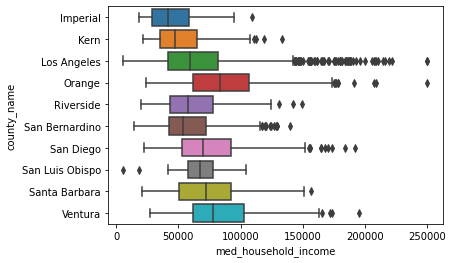

In [8]:
ax = sns.boxplot(x=df_sc["med_household_income"], y=df_sc["county_name"])

In [9]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [10]:
fig = ax.get_figure()
type(fig)

matplotlib.figure.Figure

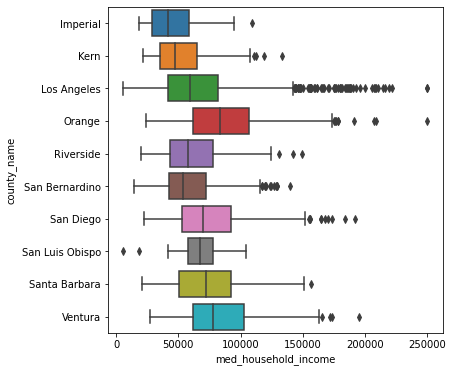

In [11]:
fig = ax.get_figure()
fig.set_size_inches(6, 6)  # inches
fig

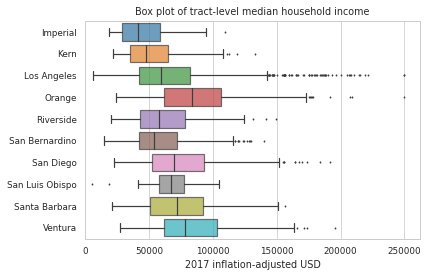

In [12]:
#configure seaborn's style
sns.set_style("whitegrid")  # visual styles
sns.set_context("paper")  # presets for scaling figure element sizes

# fliersize changes the size of the outlier dots
# boxprops lets you set more configs with a dict, such as alpha (which means opacity)
ax = sns.boxplot(x=df_sc["med_household_income"],
                 y=df_sc["county_name"],
                 fliersize=1,
                 boxprops={"alpha": 0.7})

# set the x-axis limit, the figure title, and x/y axis labels
ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median household income")
ax.set_xlabel("2017 inflation-adjusted USD")
ax.set_ylabel("")

# save figure to disk with 600 dpi and a tight bounding box
ax.get_figure().savefig("figure-income-boxplot.png", dpi=600, bbox_inches="tight")


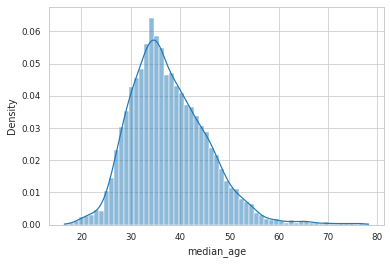

In [13]:
# distplot visualizes the variable's distribution as both histogram and kde
ax = sns.histplot(df["median_age"].dropna(), stat="density", kde=True)

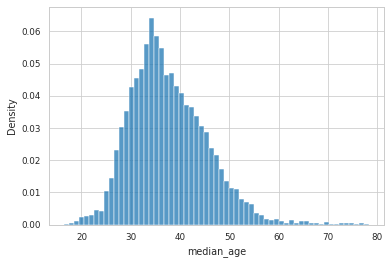

In [14]:
ax = sns.histplot(df["median_age"].dropna(), stat="density", kde=False)

In [15]:
# subset the dataframe into majority white and majority hispanic subsets
df_wht = df[df["pct_white"] > 50]
df_hsp = df[df["pct_hispanic"] > 50]

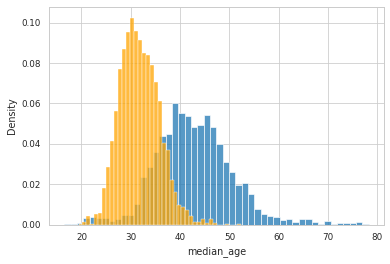

In [16]:
# compare their distributions to each other
ax = sns.histplot(df_wht["median_age"].dropna(), stat="density")
ax = sns.histplot(df_hsp["median_age"].dropna(), stat="density", color="orange")

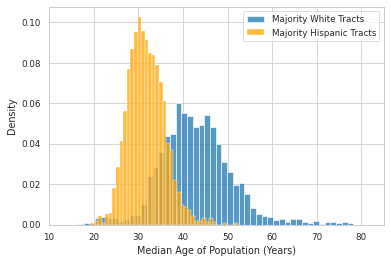

In [17]:
# improve the aesthetics: label each distribution and create a legend
ax = sns.histplot(df_wht["median_age"].dropna(),
                  stat="density",
                  label="Majority White Tracts")

ax = sns.histplot(df_hsp["median_age"].dropna(),
                  stat="density",
                  label="Majority Hispanic Tracts",
                  color="orange")
ax.legend()

# set x-limit, add x-label, then save to disk
ax.set_xlim(10, 85)
ax.set_xlabel("Median Age of Population (Years)")
ax.get_figure().savefig("figure-age-distributions.png", dpi=600, bbox_inches="tight")

## Pairwise relationships

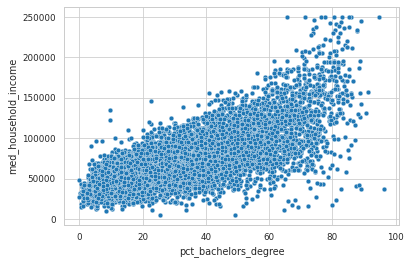

In [18]:
#scatter-plot two variables
ax = sns.scatterplot(x=df["pct_bachelors_degree"], y=df["med_household_income"])

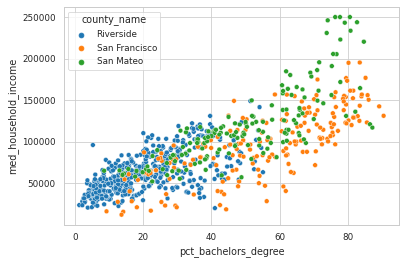

In [19]:
# scatter-plot two variables, broken out across three counties by color
counties = ["Riverside", "San Mateo", "San Francisco"]
df_counties = df[df["county_name"].isin(counties)]
ax = sns.scatterplot(x=df_counties["pct_bachelors_degree"],
                     y=df_counties["med_household_income"],
                     hue=df_counties["county_name"])

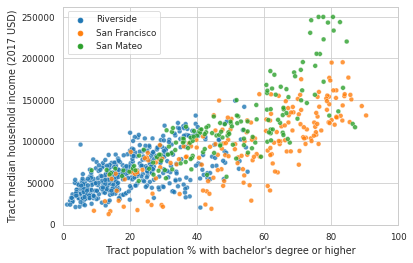

In [20]:
# same thing again, but styled more nicely
counties = ["Riverside", "San Mateo", "San Francisco"]
df_counties = df[df["county_name"].isin(counties)]
ax = sns.scatterplot(x=df_counties["pct_bachelors_degree"],
                     y=df_counties["med_household_income"],
                     hue=df_counties["county_name"],
                     alpha=0.8)

# remove the column name from the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# set x/y limits, labels, and save figure
ax.set_xlim(0, 100)
ax.set_ylim(bottom=0)
ax.set_xlabel("Tract population % with bachelor's degree or higher")
ax.set_ylabel("Tract median household income (2017 USD)")
ax.get_figure().savefig("figure-income-degree.png", dpi=600, bbox_inches="tight")

In [21]:
#subset of SF county tracts, and just 4 variables
df_sf = df[df["county_name"] == "San Francisco"]
df_sf = df_sf[["pct_bachelors_degree", "med_household_income", "med_home_value", "mean_commute_time"]]
df_sf.head()

,pct_bachelors_degree,med_household_income,med_home_value,mean_commute_time
GEOID10,,,,
06075012402,61.1,46422.0,704500.0,23.3
06075012401,29.4,23467.0,NaN,25.1
06075012202,34.8,36719.0,977900.0,24.9
06075012201,44.9,56298.0,577600.0,30.3
06075011902,62.3,84735.0,481000.0,29.6


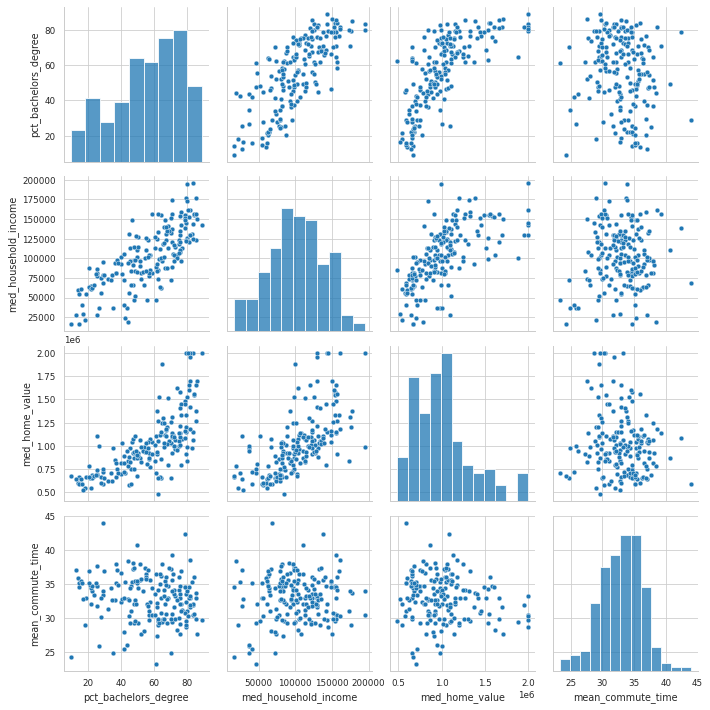

In [22]:
#SF tracts across these 4 variables

ax = sns.pairplot(df_sf.dropna())

In [23]:
# a correlation matrix
correlations = df_sf.corr()
correlations.round(2)

,pct_bachelors_degree,med_household_income,med_home_value,mean_commute_time
pct_bachelors_degree,1.00,0.76,0.72,-0.02
med_household_income,0.76,1.00,0.65,0.20
med_home_value,0.72,0.65,1.00,-0.14
mean_commute_time,-0.02,0.20,-0.14,1.00


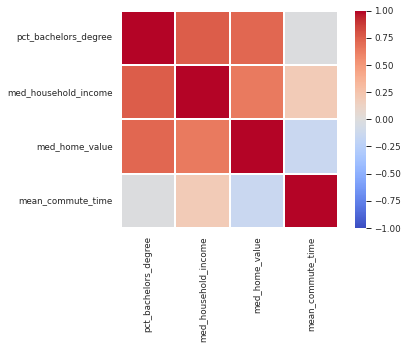

In [24]:
ax = sns.heatmap(correlations, vmin=-1, vmax=1, center=0, cmap="coolwarm", square=True, linewidths=1)

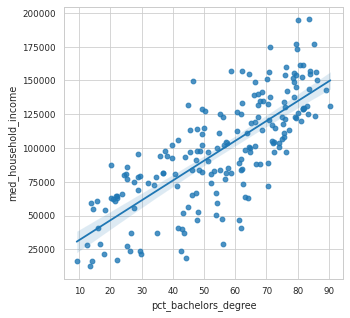

In [25]:
# a linear (regression) trend line + confidence interval
ax = sns.regplot(x=df_sf["pct_bachelors_degree"], y=df_sf["med_household_income"])
ax.get_figure().set_size_inches(5, 5)  # make it square

## Bar plots and count plots

In [26]:
counts = df_sc["county_name"].value_counts().sort_index()
counts

Imperial             31
Kern                151
Los Angeles        2346
Orange              583
Riverside           453
San Bernardino      369
San Diego           628
San Luis Obispo      54
Santa Barbara        90
Ventura             174
Name: county_name, dtype: int64

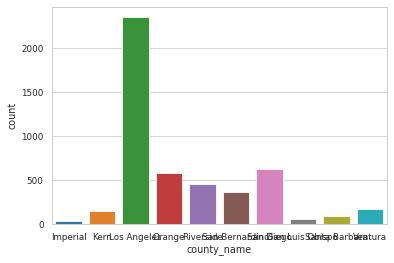

In [27]:
ax = sns.countplot(x=df_sc["county_name"])

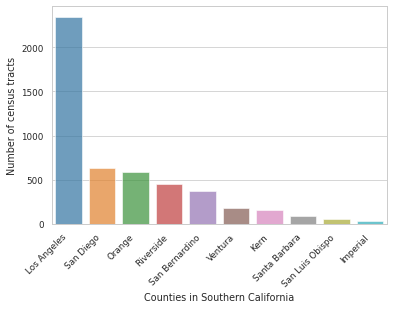

In [28]:
# same thing again, but ordered and styled more nicely
order = df_sc["county_name"].value_counts().index
ax = sns.countplot(x=df_sc["county_name"], order=order, alpha=0.7)

# rotate the tick labels, set x and y axis labels, then save
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_xlabel("Counties in Southern California")
ax.set_ylabel("Number of census tracts")
ax.get_figure().savefig("county-tracts-countplot.png", dpi=600, bbox_inches="tight")

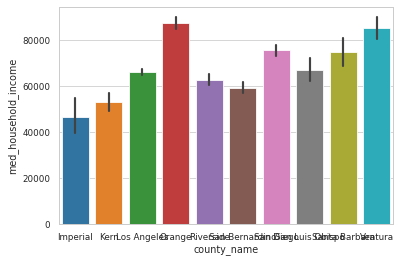

In [29]:
# simple bar plot: estimate means of tract median household income + 95% confidence interval
ax = sns.barplot(x=df_sc["county_name"], y=df_sc["med_household_income"])

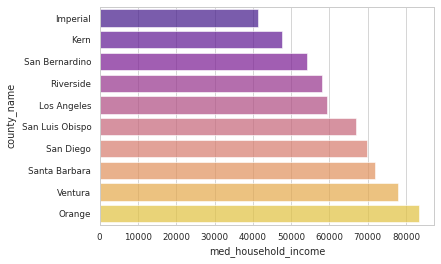

In [30]:
# nicer bar plot sorted by median value
order = df_sc.groupby("county_name")["med_household_income"].median().sort_values().index
ax = sns.barplot(x=df_sc["med_household_income"],
                 y=df_sc["county_name"],
                 estimator=np.median,
                 ci=None,
                 order=order,
                 alpha=0.7,
                 palette="plasma")

## Line plots

In [32]:
df_gdp = pd.read_csv("/content/gdp.csv").set_index("year")
df_gdp.shape

(217, 5)

In [33]:
df_gdp.tail()

,GBR,ITA,PER,SWE,USA
year,,,,,
2012,35185,34068,10533,41650,50394
2013,35618,33094,11034,41811,50863
2014,36436,32829,11186,42476,51664
2015,36941,33118,11445,43746,52591
2016,37334,33419,11776,44659,53015


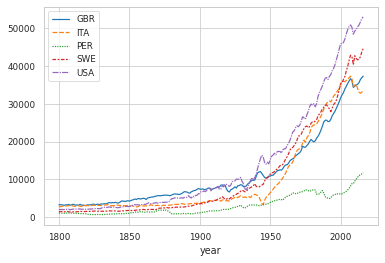

In [34]:
# simple line plot
# seaborn uses the index as x-axis and individual lines for each column
ax = sns.lineplot(data=df_gdp)

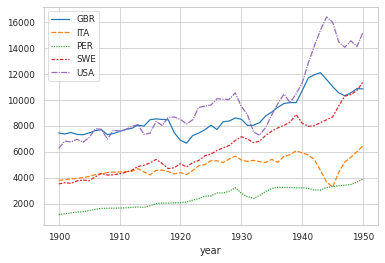

In [35]:
# same thing, but subset to only show 50 years of data (1900-1950)
ax = sns.lineplot(data=df_gdp.loc[1900:1950])

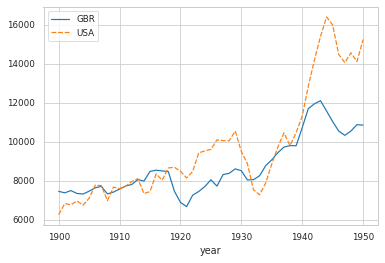

In [36]:
# same thing, but also subset to only show 2 countries
ax = sns.lineplot(data=df_gdp.loc[1900:1950, ["GBR", "USA"]])

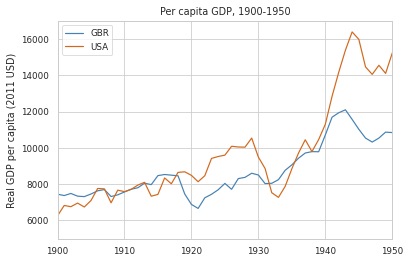

In [37]:
# same thing again, but styled more nicely
ax = sns.lineplot(data=df_gdp.loc[1900:1950, ["GBR", "USA"]],
                  dashes=False,
                  palette=["steelblue", "chocolate"])

ax.set_xlim(1900, 1950)
ax.set_ylim(5000, 17000)
ax.set_xlabel("")
ax.set_ylabel("Real GDP per capita (2011 USD)")
ax.set_title("Per capita GDP, 1900-1950")
ax.get_figure().savefig("country-gdp-lineplot.png", dpi=600, bbox_inches="tight")

## With color

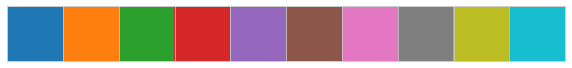

In [38]:
sns.palplot(sns.color_palette())

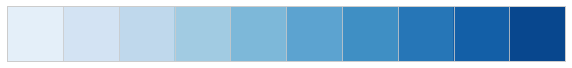

In [40]:
sns.palplot(sns.color_palette("Blues", n_colors=10))

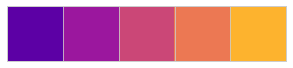

In [41]:
sns.palplot(sns.color_palette("plasma", n_colors=5))

In [42]:
# configure seaborn's style
sns.set_style("whitegrid")
sns.set_context("paper")

In [44]:

df = pd.read_csv("/content/census_tracts_data_ca.csv", dtype={"GEOID10": str}).set_index("GEOID10")
df.shape

(8057, 27)

In [45]:
# create a new column of income in units of 1000s of USD
df["med_household_income_1000s"] = df["med_household_income"] / 1000

In [46]:
socal_counties = ["Imperial",
                  "Kern",
                  "Los Angeles",
                  "Orange",
                  "Riverside",
                  "San Bernardino",
                  "San Diego",
                  "San Luis Obispo",
                  "Santa Barbara",
                  "Ventura"]
mask = df["county_name"].isin(socal_counties)
df_sc = df[mask]
df_sc.shape

(4879, 28)

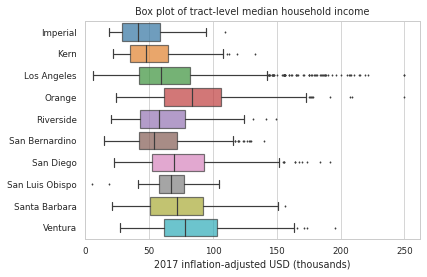

In [47]:
ax = sns.boxplot(x=df_sc["med_household_income_1000s"],
                 y=df_sc["county_name"],
                 fliersize=1,
                 boxprops={"alpha": 0.7})

ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median household income")
ax.set_xlabel("2017 inflation-adjusted USD (thousands)")
ax.set_ylabel("")
pass  # just show the figure

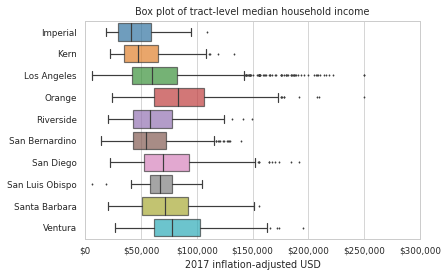

In [48]:
ax = sns.boxplot(x=df_sc["med_household_income"],
                 y=df_sc["county_name"],
                 fliersize=1,
                 boxprops={"alpha": 0.7})

ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median household income")
ax.set_xlabel("2017 inflation-adjusted USD")
ax.set_ylabel("")

# format the x tick labels like $150,000 instead of 150000
new_labels = ["${:,.0f}".format(x) for x in ax.get_xticks()]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(new_labels)
pass  # just show the figure

In [49]:
ax.get_xticks()

array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.])

In [51]:
x = ax.get_xticks()[2]
"${:,.0f}".format(x)

'$100,000'

In [52]:
"${:,.2f}".format(x)

'$100,000.00'